<a href="https://colab.research.google.com/github/devdattakhoche/General_Purpose_Repo/blob/master/Twitter_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Required Packages

In [1]:
!pip install tweet-preprocessor

## Importing Libraries

In [2]:


# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

# Sklearn Imports
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Preprocessing Imports
import re
import preprocessor as p
from gensim.parsing.preprocessing import remove_stopwords
import pandas as pd

# Visulisation Imports
import matplotlib.pyplot as plt
import seaborn as sns




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Dataset

In [3]:
df = pd.read_csv('https://tinyurl.com/ts9ktc2u')
df.count()

label    41258
text     41258
dtype: int64

## Preprocessing

In [4]:
df = df.dropna()
df = df.drop_duplicates()
y=df['label']
df.drop(['label'],inplace=True,axis=1)

def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

df['text'] = df.apply(stopword_removal, axis=1)
df['text'] = df.apply(preprocess_tweet, axis=1)
df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

## Tokenizing Sentences

In [5]:
df['text'] = df['text'].apply(word_tokenize)

## Stemming

In [6]:
stemmer = PorterStemmer()
def stem_words(text):       
    return " ".join([stemmer.stem(word) for word in text])
df['text'] = df['text'].apply(lambda text: stem_words(text))

## Converting Text to Vector
This is necesary so that machine will be able understand the data.We are doing this by converting string to vectos 

In [7]:
bow=CountVectorizer(min_df=2,max_features=100000)
bow.fit(df['text'])
text_processed = bow.transform(df['text']).toarray()

## Train-Test-Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(text_processed, y, test_size=0.2)

# Machine Learning Models

In [9]:
def plot_heatmap(y_pred , y_test):
  cf_matrix = confusion_matrix(y_test, y_pred)
  ax= plt.subplot()
  #annot=True to annotate cells
  sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
  # labels, title and ticks
  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels');
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);


## Logistic Regression

Accuracy :  97.63587618815501


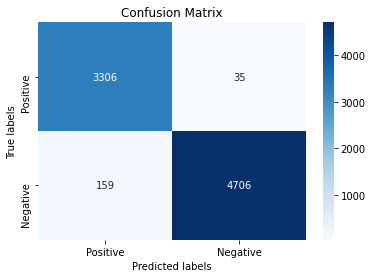

In [10]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print("Accuracy : ",accuracy_score(y_pred,y_test)*100)
plot_heatmap(y_pred,y_test)

## Random Forest Classifier

Accuracy :  96.45381428223251


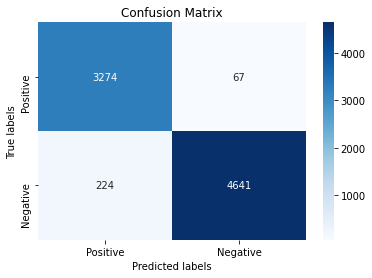

In [11]:
ranfor=RandomForestClassifier(n_estimators=100)
ranfor.fit(X_train,y_train)
y_pred = ranfor.predict(X_test)
print("Accuracy : ",accuracy_score(y_pred,y_test)*100)
plot_heatmap(y_pred,y_test)

## Naive Bayes Classifier

Accuracy :  70.27784547891787


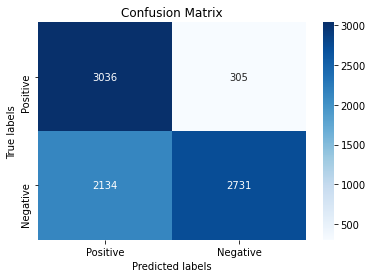

In [12]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy : ",accuracy_score(y_pred,y_test)*100)
plot_heatmap(y_pred,y_test)